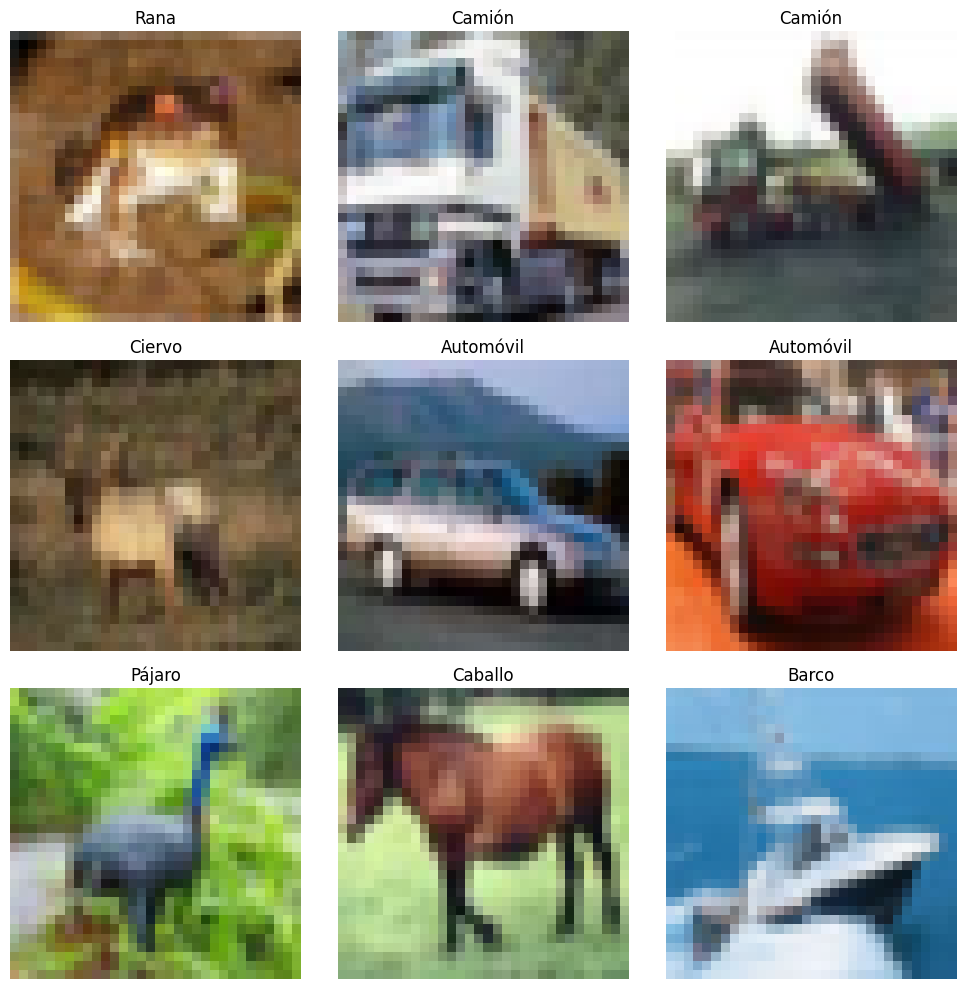

In [ ]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# Cargamos el conjunto de datos CIFAR-10
# Este dataset contiene 60,000 imágenes a color de 32x32 píxeles en 10 categorías
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizamos los valores de píxeles al rango [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convertimos las etiquetas a formato one-hot
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Definimos los nombres de las clases para su visualización
class_names = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

# Función para visualizar imágenes con sus etiquetas
def visualizar_imagenes(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Llamar a la función para visualizar las primeras imágenes del conjunto de entrenamiento
visualizar_imagenes(train_images, train_labels, class_names)


In [ ]:
from tensorflow.keras import datasets, layers, models

def crear_modelo_cnn():
    # Creamos un modelo secuencial
    modelo = models.Sequential()

    # Primera capa convolucional + max pooling
    modelo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    modelo.add(layers.MaxPooling2D((2, 2)))

    # Segunda capa convolucional + max pooling
    modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
    modelo.add(layers.MaxPooling2D((2, 2)))

    # Tercera capa convolucional (sin pooling)
    modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Aplanamos las salidas para conectar con las capas densas
    modelo.add(layers.Flatten())

    # Capa densa intermedia
    modelo.add(layers.Dense(64, activation='relu'))

    # Capa de salida: 10 clases con softmax
    modelo.add(layers.Dense(10, activation='softmax'))

    # Compilamos el modelo
    modelo.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

    return modelo

# Creamos el modelo
modelo_cnn = crear_modelo_cnn()

# Mostramos un resumen de la arquitectura del modelo
modelo_cnn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.3918 - loss: 1.6557 - val_accuracy: 0.5331 - val_loss: 1.3160
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.5686 - loss: 1.2095 - val_accuracy: 0.6167 - val_loss: 1.0781
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.6340 - loss: 1.0390 - val_accuracy: 0.6508 - val_loss: 0.9980
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.6727 - loss: 0.9275 - val_accuracy: 0.6533 - val_loss: 0.9874
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7051 - loss: 0.8387 - val_accuracy: 0.6852 - val_loss: 0.9010
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.7232 - loss: 0.7865 - val_accuracy: 0.6856 - val_loss: 0.9116
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.7413 - loss: 0.7356 - val_accuracy: 0.6946 - val_loss: 0.8869
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7532 -

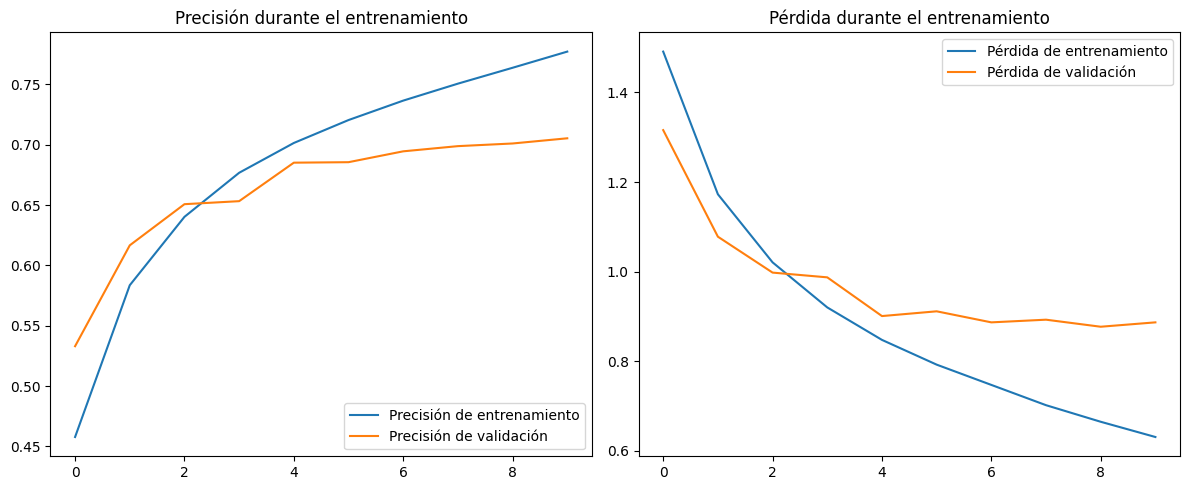

In [ ]:
def entrenar_modelo(modelo, train_images, train_labels, test_images, test_labels, epochs=10):
    # Entrena el modelo y guarda el historial
    historial = modelo.fit(
        train_images, train_labels,
        epochs=epochs,
        validation_data=(test_images, test_labels)
    )

    # Evaluamos el modelo con los datos de prueba
    resultados = modelo.evaluate(test_images, test_labels)
    print(f"Precisión en datos de prueba: {resultados[1]:.4f}")

    return historial

# Entrenamos el modelo
historial = entrenar_modelo(modelo_cnn, train_images, train_labels, test_images, test_labels)

def visualizar_historial(historial):
    acc = historial.history['accuracy']
    val_acc = historial.history['val_accuracy']
    loss = historial.history['loss']
    val_loss = historial.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Precisión de entrenamiento')
    plt.plot(epochs_range, val_acc, label='Precisión de validación')
    plt.legend(loc='lower right')
    plt.title('Precisión durante el entrenamiento')

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Pérdida de entrenamiento')
    plt.plot(epochs_range, val_loss, label='Pérdida de validación')
    plt.legend(loc='upper right')
    plt.title('Pérdida durante el entrenamiento')

    plt.tight_layout()
    plt.show()

# Llamamos a la función para visualizar el historial
visualizar_historial(historial)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


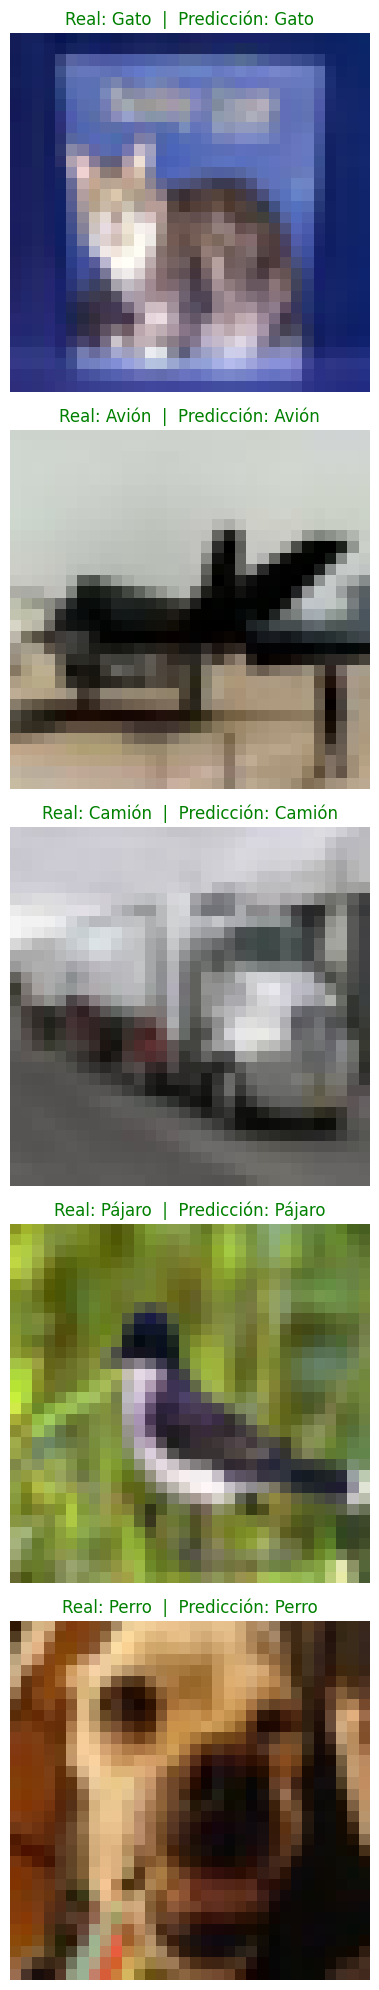

In [ ]:
def predecir_y_visualizar(modelo, images, labels, class_names, num_imagenes=5):
    # Seleccionamos imágenes aleatorias
    indices = np.random.choice(len(images), num_imagenes, replace=False)

    # Realizamos las predicciones
    predicciones = modelo.predict(images[indices])
    clases_predichas = np.argmax(predicciones, axis=1)
    clases_reales = np.argmax(labels[indices], axis=1)

    # Visualizamos imágenes con predicciones
    plt.figure(figsize=(12, 4 * num_imagenes))
    for i, idx in enumerate(indices):
        plt.subplot(num_imagenes, 1, i + 1)
        plt.imshow(images[idx])
        pred = class_names[clases_predichas[i]]
        real = class_names[clases_reales[i]]
        color = 'green' if clases_predichas[i] == clases_reales[i] else 'red'
        plt.title(f"Real: {real}  |  Predicción: {pred}", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Llamar a la función con el conjunto de prueba
predecir_y_visualizar(modelo_cnn, test_images, test_labels, class_names, num_imagenes=5)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


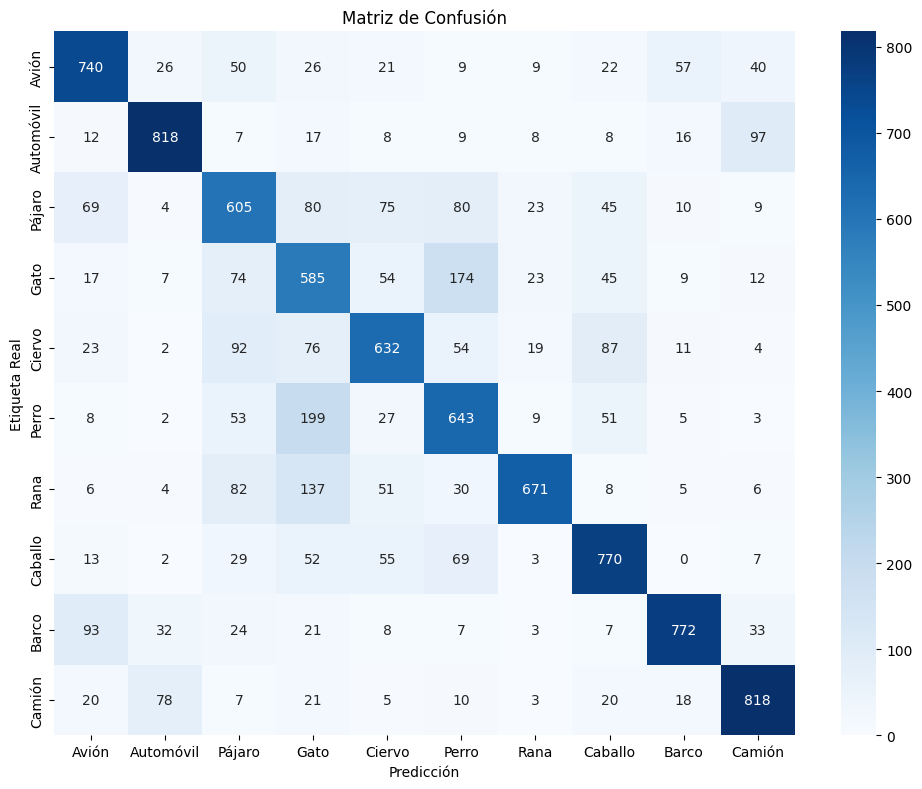

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def mostrar_matriz_confusion(modelo, images, labels, class_names):
    # Obtenemos las predicciones para todas las imágenes
    predicciones = modelo.predict(images)
    clases_predichas = np.argmax(predicciones, axis=1)
    clases_reales = np.argmax(labels, axis=1)

    # Calculamos la matriz de confusión
    matriz = confusion_matrix(clases_reales, clases_predichas)

    # Visualizamos la matriz como un heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predicción')
    plt.ylabel('Etiqueta Real')
    plt.title('Matriz de Confusión')
    plt.tight_layout()
    plt.show()

# Mostrar la matriz de confusión para los datos de prueba
mostrar_matriz_confusion(modelo_cnn, test_images, test_labels, class_names)


In [ ]:
from tensorflow.keras import models, layers, optimizers

def crear_modelo_mejorado():
    modelo = models.Sequential()

    # Capa 1: Convolucional + BatchNorm + Pooling
    modelo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.MaxPooling2D((2, 2)))
    modelo.add(layers.Dropout(0.25))

    # Capa 2: Convolucional + BatchNorm + Pooling
    modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.MaxPooling2D((2, 2)))
    modelo.add(layers.Dropout(0.3))

    # Capa 3: Convolucional + BatchNorm
    modelo.add(layers.Conv2D(128, (3, 3), activation='relu'))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.Dropout(0.4))

    # Flatten + Fully Connected
    modelo.add(layers.Flatten())
    modelo.add(layers.Dense(128, activation='relu'))
    modelo.add(layers.Dropout(0.5))
    modelo.add(layers.Dense(10, activation='softmax'))

    # Compilación con tasa de aprendizaje personalizada
    opt = optimizers.Adam(learning_rate=0.0005)
    modelo.compile(optimizer=opt,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

    return modelo

# Crear y ver el resumen del nuevo modelo
modelo_mejorado = crear_modelo_mejorado()
modelo_mejorado.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def aplicar_data_augmentation():
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        zoom_range=0.1
    )
    return datagen

# Crear el generador
datagen = aplicar_data_augmentation()

# Ajustar al conjunto de entrenamiento
datagen.fit(train_images)

# Entrenamiento con data augmentation
historial_mejorado = modelo_mejorado.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=20,
    validation_data=(test_images, test_labels)
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 171ms/step - accuracy: 0.2361 - loss: 2.6940 - val_accuracy: 0.4867 - val_loss: 1.4170
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 135s 172ms/step - accuracy: 0.3953 - loss: 1.6793 - val_accuracy: 0.5225 - val_loss: 1.3333
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 179ms/step - accuracy: 0.4555 - loss: 1.5187 - val_accuracy: 0.5451 - val_loss: 1.2679
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 134s 171ms/step - accuracy: 0.4894 - loss: 1.4224 - val_accuracy: 0.6026 - val_loss: 1.1168
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 182ms/step - accuracy: 0.5167 - loss: 1.3480 - val_accuracy: 0.5343 - val_loss: 1.3737
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 169ms/step - accuracy: 0.5383 - loss: 1.2867 - val_accuracy: 0.4148 - val_loss: 2.0647
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 177ms/step - accuracy: 0.5577 - loss: 1.2491 - val_accuracy: 0.5700 - val_loss: 1.2355
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 170ms/step - accuracy: 0.5754 - loss: 1.19

In [ ]:
def experimentar_hiperparametros():
    for lr in [0.001, 0.0005]:
        for dropout_rate in [0.3, 0.5]:
            print(f"\nProbando con learning_rate={lr}, dropout={dropout_rate}")

            modelo = models.Sequential()
            modelo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
            modelo.add(layers.MaxPooling2D((2, 2)))
            modelo.add(layers.Dropout(dropout_rate))
            modelo.add(layers.Flatten())
            modelo.add(layers.Dense(64, activation='relu'))
            modelo.add(layers.Dense(10, activation='softmax'))

            opt = optimizers.Adam(learning_rate=lr)
            modelo.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

            modelo.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


**PUNTO 2**

In [ ]:
# Importamos las librerías necesarias
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import random
import re
import os
from PIL import Image
import io

# Descargamos recursos de NLTK necesarios para NLP
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Cargamos un modelo preentrenado para reconocimiento de imágenes
def cargar_modelo_imagenes():
    # Usamos MobileNetV2 preentrenado en ImageNet (ligero y eficiente)
    modelo_base = MobileNetV2(weights='imagenet', include_top=True)
    return modelo_base

# Función para preprocesar imágenes desde ruta o desde objeto PIL
def preprocesar_imagen(ruta_imagen=None, imagen_pil=None):
    """
    Preprocesa una imagen para el modelo de reconocimiento.
    Acepta una ruta de archivo o una imagen PIL.
    """
    if ruta_imagen:
        img = image.load_img(ruta_imagen, target_size=(224, 224))
    elif imagen_pil:
        img = imagen_pil.resize((224, 224))
    else:
        raise ValueError("Debes proporcionar una ruta de imagen o un objeto PIL.")

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x, img

# Inicializamos el lemmatizador para procesamiento de texto
lemmatizer = WordNetLemmatizer()

# Cargamos el modelo de imágenes
modelo_imagenes = cargar_modelo_imagenes()
print("Modelos base cargados correctamente.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Modelos base cargados correctamente.


In [ ]:
def analizar_imagen(ruta_imagen=None, imagen_pil=None):
    """
    Analiza una imagen y devuelve una descripción de lo que contiene.
    """
    # Preprocesamos la imagen
    img_array, img_mostrar = preprocesar_imagen(ruta_imagen, imagen_pil)

    if img_array is None:
        return "No se pudo procesar la imagen."

    # Realizamos la predicción
    predicciones = modelo_imagenes.predict(img_array)
    resultados = decode_predictions(predicciones, top=3)[0]  # Top 3 predicciones

    # Formateamos los resultados para una respuesta natural
    descripcion = "En esta imagen puedo ver: "
    descripcion += ", ".join([f"{nombre} (confianza: {round(prob*100, 2)}%)"
                              for (_, nombre, prob) in resultados])

    # Mostrar imagen
    plt.imshow(img_mostrar)
    plt.axis('off')
    plt.title("Imagen Analizada")
    plt.show()

    return descripcion, resultados

# Función opcional para interpretar el contexto emocional/situacional
def interpretar_contexto_imagen(predicciones):
    """
    Interpreta el contexto emocional o situacional de una imagen
    basado en los objetos detectados.
    """
    objetos = [nombre for (_, nombre, prob) in predicciones]

    contexto = ""
    if any(obj in objetos for obj in ["dog", "cat", "horse", "bird", "animal"]):
        contexto += "Parece una escena con animales, posiblemente amigable o tranquila.\n"
    if any(obj in objetos for obj in ["person", "human", "face"]):
        contexto += "Hay presencia humana en la imagen.\n"
    if any(obj in objetos for obj in ["tree", "forest", "mountain", "beach"]):
        contexto += "El entorno parece natural.\n"
    if any(obj in objetos for obj in ["laptop", "keyboard", "book", "desk"]):
        contexto += "Podría tratarse de un entorno de estudio o trabajo.\n"
    if not contexto:
        contexto = "No puedo inferir un contexto emocional claro con los objetos detectados."

    return contexto

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


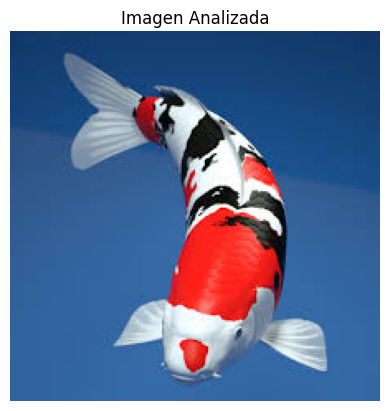

En esta imagen puedo ver: flagpole (confianza: 14.920000076293945%), parachute (confianza: 7.909999847412109%), bobsled (confianza: 5.039999961853027%)
No puedo inferir un contexto emocional claro con los objetos detectados.


In [ ]:
descripcion, pred = analizar_imagen(ruta_imagen="pez.jpg")
print(descripcion)
print(interpretar_contexto_imagen(pred))

In [ ]:
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def procesar_texto(texto):
    """
    Procesa el texto de entrada para normalización sin usar word_tokenize.
    Tokeniza con split tras limpiar caracteres especiales.
    """
    texto = texto.lower()
    # Quitar caracteres que no sean letras o números ni espacios
    texto = re.sub(r'[^a-záéíóúüñ0-9\s]', '', texto)
    # Tokenización simple por espacios
    tokens = texto.split()
    # Lematización simple
    tokens_lemmatizados = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens_lemmatizados

# Ejemplo rápido para probar:
entrada_usuario = "Hola, ¿puedes describir esta imagen?"
tokens = procesar_texto(entrada_usuario)
print(tokens)


['hola', 'puedes', 'describir', 'esta', 'imagen']


In [ ]:
import re
from nltk.stem import WordNetLemmatizer
import random

# Inicializamos el lematizador
lemmatizer = WordNetLemmatizer()

patrones_conversacion = {
    "saludos": [
        r"hola",
        r"buenos días",
        r"buenas tardes",
        r"hey",
        r"saludos"
    ],
    "preguntas_imagen": [
        r"qué ves en (la|esta) imagen",
        r"describe (la|esta) imagen",
        r"qué hay en (la|esta) imagen",
        r"qué puedes ver",
        r"analiza (la|esta) imagen"
    ],
    "consulta_psicologica": [
        r"me siento (triste|feliz|ansioso|preocupado|estresado)",
        r"tengo problemas con",
        r"no puedo (dormir|concentrarme|estudiar)",
        r"necesito ayuda con mis emociones",
        r"cómo puedo manejar (el estrés|la ansiedad|la depresión)"
    ],
    "consulta_academica": [
        r"no entiendo (este tema|esta materia)",
        r"cómo puedo estudiar mejor",
        r"tengo dificultades con",
        r"necesito ayuda con mis estudios",
        r"cómo mejorar (mi concentración|mi memoria|mis notas)"
    ],
    "despedida": [
        r"adiós",
        r"hasta luego",
        r"nos vemos",
        r"chao",
        r"bye"
    ]
}

respuestas = {
    "saludos": [
        "¡Hola! ¿En qué puedo ayudarte hoy?",
        "¡Saludos! Soy un asistente virtual. Puedo analizar imágenes y conversar contigo.",
        "¡Buen día! Estoy aquí para ayudarte con tus consultas e imágenes."
    ],
    "preguntas_imagen_sin_contexto": [
        "Para analizar una imagen, necesito que me la proporciones primero.",
        "No tengo ninguna imagen para analizar. ¿Podrías compartir una?",
        "Necesito ver una imagen antes de poder describirla."
    ],
    "consulta_psicologica": [
        "Entiendo cómo te sientes. ¿Podrías contarme más sobre eso?",
        "Es normal tener esos sentimientos. ¿Qué crees que los está causando?",
        "Gracias por compartir eso conmigo. Te escucho. ¿Desde cuándo te sientes así?"
    ],
    "consulta_academica": [
        "Aprender puede ser desafiante. ¿Con qué tema específico estás teniendo dificultades?",
        "Cada persona tiene su propio estilo de aprendizaje. ¿Has identificado qué métodos funcionan mejor para ti?",
        "El éxito académico requiere estrategia. ¿Has probado crear un horario de estudio?"
    ],
    "despedida": [
        "¡Hasta pronto! Fue un placer ayudarte.",
        "¡Adiós! Si necesitas más ayuda, aquí estaré.",
        "¡Que tengas un excelente día! Regresa cuando necesites apoyo."
    ],
    "default": [
        "Interesante. Cuéntame más.",
        "No estoy seguro de entender. ¿Podrías explicarlo de otra manera?",
        "Estoy aquí para ayudarte. ¿Puedes ser más específico?"
    ]
}

def procesar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúüñ0-9\s]', '', texto)
    tokens = texto.split()
    lemas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemas

def identificar_intencion(texto):
    texto = texto.lower()
    for categoria, patrones in patrones_conversacion.items():
        for patron in patrones:
            if re.search(patron, texto):
                return categoria
    return "default"

# Bucle para entrada continua
while True:
    entrada_usuario = input("Tú: ")
    if entrada_usuario.lower() in ["salir", "exit", "quit"]:
        print("Bot: ¡Hasta luego!")
        break

    tokens = procesar_texto(entrada_usuario)
    intencion = identificar_intencion(entrada_usuario)

    respuesta = random.choice(respuestas[intencion])
    print("Bot:", respuesta)


KeyboardInterrupt: Interrupted by user

In [ ]:
# Instalación necesaria
!pip install torch torchvision nltk --quiet

import torch
from torchvision import models, transforms
from PIL import Image
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import random

# Descargar recursos NLTK para tokenización y lematización
nltk.download('punkt')
nltk.download('wordnet')

# Modelo preentrenado para reconocimiento de imagen (ResNet50)
modelo_cv = models.resnet50(pretrained=True)
modelo_cv.eval()

# Transformaciones para imagen
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Cargar etiquetas de ImageNet
from urllib.request import urlopen
LABELS_URL = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
with urlopen(LABELS_URL) as f:
    etiquetas = [line.decode('utf-8').strip() for line in f.readlines()]

# Función para analizar imagen
def analizar_imagen(ruta_imagen=None, imagen_pil=None):
    try:
        if ruta_imagen:
            imagen = Image.open(ruta_imagen).convert("RGB")
        elif imagen_pil:
            imagen = imagen_pil.convert("RGB")
        else:
            return "No hay imagen para analizar"

        entrada = transform(imagen).unsqueeze(0)  # batch dimension

        with torch.no_grad():
            salida = modelo_cv(entrada)

        probabilidades = torch.nn.functional.softmax(salida[0], dim=0)
        top3_prob, top3_catid = torch.topk(probabilidades, 3)

        resultados = []
        for i in range(top3_prob.size(0)):
            resultados.append(f"{etiquetas[top3_catid[i]]} ({top3_prob[i].item()*100:.1f}%)")

        return "Lo que veo en la imagen: " + ", ".join(resultados)

    except Exception as e:
        return f"Error al analizar la imagen: {e}"

# Lematizador y tokenizador NLTK
lemmatizer = WordNetLemmatizer()

# Patrones para identificar intenciones
patrones_conversacion = {
    "saludos": [
        r"hola",
        r"buenos días",
        r"buenas tardes",
        r"hey",
        r"saludos"
    ],
    "preguntas_imagen": [
        r"qué ves en (la|esta) imagen",
        r"describe (la|esta) imagen",
        r"qué hay en (la|esta) imagen",
        r"qué puedes ver",
        r"analiza (la|esta) imagen",
        r"analiza la imagen"
    ],
    "despedida": [
        r"adiós",
        r"hasta luego",
        r"nos vemos",
        r"chao",
        r"bye"
    ]
}

# Respuestas básicas
respuestas = {
    "saludos": [
        "¡Hola! ¿En qué puedo ayudarte hoy?",
        "¡Saludos! Soy un asistente virtual. Puedo analizar imágenes y conversar contigo.",
        "¡Buen día! Estoy aquí para ayudarte con tus consultas e imágenes."
    ],
    "preguntas_imagen_sin_contexto": [
        "Para analizar una imagen, necesito que me la proporciones primero.",
        "No tengo ninguna imagen para analizar. ¿Podrías compartir una?",
        "Necesito ver una imagen antes de poder describirla."
    ],
    "despedida": [
        "¡Hasta pronto! Fue un placer ayudarte.",
        "¡Adiós! Si necesitas más ayuda, aquí estaré.",
        "¡Que tengas un excelente día! Regresa cuando necesites apoyo."
    ],
    "default": [
        "Estoy aquí para ayudarte. ¿Puedes ser más específico?",
        "Interesante. Cuéntame más.",
        "No estoy seguro de entender. ¿Podrías explicarlo de otra manera?"
    ]
}

# Procesar texto: tokenizar y lematizar
def procesar_texto(texto):
    texto = texto.lower()
    tokens = word_tokenize(texto)
    lemas = [lemmatizer.lemmatize(token) for token in tokens if re.match(r'\w+', token)]
    return lemas

# Identificar intención
def identificar_intencion(texto):
    texto = texto.lower()
    for categoria, patrones in patrones_conversacion.items():
        for patron in patrones:
            if re.search(patron, texto):
                return categoria
    return "default"

# Clase Asistente Virtual
class AsistenteVirtual:
    def __init__(self):
        self.imagen_actual = None
        self.analisis_imagen_actual = None
        self.contexto_conversacion = []

    def procesar_imagen(self, ruta_imagen=None):
        try:
            self.analisis_imagen_actual = analizar_imagen(ruta_imagen)
            self.imagen_actual = ruta_imagen
            return f"Imagen cargada correctamente. {self.analisis_imagen_actual}"
        except Exception as e:
            return f"No pude analizar la imagen. Error: {e}"

    def responder(self, texto_usuario):
        categoria = identificar_intencion(texto_usuario)

        if categoria == "preguntas_imagen":
            if self.imagen_actual is None:
                return random.choice(respuestas["preguntas_imagen_sin_contexto"])
            else:
                return self.analisis_imagen_actual

        if categoria in respuestas:
            return random.choice(respuestas[categoria])

        return random.choice(respuestas["default"])

# Interfaz CLI para interacción
def interfaz_cli():
    asistente = AsistenteVirtual()
    print("=== Asistente Virtual ===")
    print("Puedo analizar imágenes y conversar contigo.")
    print("Para analizar una imagen, escribe 'ver imagen: [ruta_a_la_imagen]'")
    print("Para salir, escribe 'salir'")

    while True:
        entrada = input("\nTú: ")

        if entrada.lower() == "salir":
            print("Asistente: ¡Hasta pronto!")
            break

        if entrada.lower().startswith("ver imagen:"):
            ruta = entrada[11:].strip()
            respuesta = asistente.procesar_imagen(ruta)
            print(f"Asistente: {respuesta}")
        else:
            respuesta = asistente.responder(entrada)
            print(f"Asistente: {respuesta}")

# Ejecutar la interfaz CLI
interfaz_cli()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 768.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 9

=== Asistente Virtual ===
Puedo analizar imágenes y conversar contigo.
Para analizar una imagen, escribe 'ver imagen: [ruta_a_la_imagen]'
Para salir, escribe 'salir'

Tú: ver imagen: perro.jpg
Asistente: Imagen cargada correctamente. Lo que veo en la imagen: golden retriever (98.2%), Labrador retriever (0.8%), clumber (0.2%)

Tú: ¿Qué ves en esta imagen?
Asistente: Lo que veo en la imagen: golden retriever (98.2%), Labrador retriever (0.8%), clumber (0.2%)

Tú: salir
Asistente: ¡Hasta pronto!


In [ ]:
# Instalación necesaria
!pip install nltk --quiet

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import random

# Descargar recursos necesarios de NLTK
nltk.download('vader_lexicon')

# Función para generar ejercicios educativos simples
def generador_ejercicios(tema, dificultad):
    """
    Genera ejercicios educativos basados en un tema y nivel de dificultad.
    Por simplicidad, solo se generan preguntas tipo matemáticas y vocabulario.
    """
    ejercicios = []
    if tema.lower() == "matemáticas":
        if dificultad == "fácil":
            ejercicios = [
                "¿Cuánto es 2 + 2?",
                "¿Cuál es el resultado de 5 - 3?",
                "¿Cuánto es 3 x 4?"
            ]
        elif dificultad == "intermedio":
            ejercicios = [
                "Resuelve: 12 / 4 + 3",
                "¿Cuál es el valor de x si 2x = 10?",
                "Calcula el área de un rectángulo de 5x7"
            ]
        elif dificultad == "avanzado":
            ejercicios = [
                "Resuelve la ecuación cuadrática: x² - 5x + 6 = 0",
                "Calcula la derivada de f(x) = 3x² + 2x",
                "Encuentra el límite cuando x → 0 de (sin x)/x"
            ]
    elif tema.lower() == "vocabulario":
        if dificultad == "fácil":
            ejercicios = [
                "Define la palabra 'casa'.",
                "¿Cuál es el antónimo de 'grande'?",
                "Escribe una oración usando la palabra 'feliz'."
            ]
        elif dificultad == "intermedio":
            ejercicios = [
                "¿Qué significa la palabra 'efímero'?",
                "Da un sinónimo de 'rápido'.",
                "Usa 'melancolía' en una oración."
            ]
        elif dificultad == "avanzado":
            ejercicios = [
                "Explica el uso de la metáfora en literatura.",
                "¿Qué es un oxímoron? Da un ejemplo.",
                "Analiza el significado de la palabra 'paradigma'."
            ]
    else:
        ejercicios = ["Lo siento, aún no puedo generar ejercicios para ese tema."]

    return random.choice(ejercicios)


# Análisis básico de sentimiento usando VADER
def analisis_sentimiento(texto):
    """
    Realiza un análisis simple de sentimiento en el texto del usuario.
    Retorna 'positivo', 'neutral' o 'negativo' según el sentimiento detectado.
    """
    sia = SentimentIntensityAnalyzer()
    puntajes = sia.polarity_scores(texto)
    if puntajes['compound'] >= 0.05:
        return "positivo"
    elif puntajes['compound'] <= -0.05:
        return "negativo"
    else:
        return "neutral"


# Asistente virtual mejorado que hereda de la clase base (defínela o importa tu clase base antes)
class AsistenteVirtualMejorado:
    def __init__(self):
        self.imagen_actual = None
        self.analisis_imagen_actual = None
        self.contexto_conversacion = []

    def procesar_imagen(self, ruta_imagen=None):
        # Aquí puedes llamar a tu función analizar_imagen si la tienes definida
        # Para el ejemplo solo guardamos el nombre
        self.imagen_actual = ruta_imagen
        self.analisis_imagen_actual = f"Imagen '{ruta_imagen}' procesada (simulación)."
        return self.analisis_imagen_actual

    def analizar_sentimiento_usuario(self, texto):
        sentimiento = analisis_sentimiento(texto)
        return sentimiento

    def recomendar_recursos(self, tema, sentimiento=None):
        recomendaciones = {
            "matemáticas": "Te recomiendo practicar con Khan Academy o usar la app Photomath.",
            "vocabulario": "Puedes usar Duolingo para mejorar vocabulario de forma interactiva.",
            "psicología": "Considera técnicas de mindfulness y consulta con un profesional si es necesario."
        }
        base = recomendaciones.get(tema.lower(), "No tengo recomendaciones específicas para ese tema.")

        if sentimiento == "negativo":
            return base + " Si te sientes mal, recuerda que hablar con alguien puede ayudar."
        return base

    def crear_plan_estudio(self, tema, nivel):
        plan = f"Plan de estudio para {tema} en nivel {nivel}:\n"
        plan += "- Dedica 30 minutos diarios al estudio.\n"
        plan += "- Realiza ejercicios prácticos.\n"
        plan += "- Revisa tus errores y consulta dudas.\n"
        plan += "- Usa recursos online y libros recomendados.\n"
        return plan

    def responder(self, texto_usuario):
        # Aquí puedes agregar lógica para detectar intenciones y responder con las nuevas funciones
        if "ejercicio" in texto_usuario.lower():
            # Extraer tema y dificultad simuladamente
            tema = "matemáticas"
            dificultad = "fácil"
            return generador_ejercicios(tema, dificultad)
        if "sentimiento" in texto_usuario.lower():
            sentimiento = self.analizar_sentimiento_usuario(texto_usuario)
            return f"Detecto que tu sentimiento es {sentimiento}."
        if "recomienda" in texto_usuario.lower():
            return self.recomendar_recursos("matemáticas")
        if "plan de estudio" in texto_usuario.lower():
            return self.crear_plan_estudio("matemáticas", "intermedio")
        return "Lo siento, aún estoy aprendiendo a responder eso."


# Ejemplos de casos de uso
def mostrar_casos_uso():
    print("=== Caso de uso: Apoyo académico ===")
    asistente = AsistenteVirtualMejorado()
    print(asistente.responder("Quiero un ejercicio para matemáticas fácil"))
    print(asistente.responder("Puedes recomendarme recursos para estudiar matemáticas?"))
    print(asistente.responder("Crea un plan de estudio para matemáticas nivel intermedio"))

    print("\n=== Caso de uso: Apoyo emocional ===")
    print(asistente.responder("Me siento triste y necesito ayuda con mi sentimiento"))

    print("\n=== Caso de uso: Análisis de imágenes educativas ===")
    print(asistente.procesar_imagen("cerebro.jpg"))


# Prueba sencilla del sistema completo
def prueba_sistema_completo():
    asistente = AsistenteVirtualMejorado()
    print("Usuario: Hola")
    print("Asistente:", asistente.responder("Hola"))
    print("Usuario: Quiero un ejercicio para matemáticas fácil")
    print("Asistente:", asistente.responder("Quiero un ejercicio para matemáticas fácil"))
    print("Usuario: Me siento un poco ansioso")
    print("Asistente:", asistente.responder("Me siento un poco ansioso"))
    print("Usuario: Recomiéndame recursos para estudiar matemáticas")
    print("Asistente:", asistente.responder("Recomiéndame recursos para estudiar matemáticas"))
    print("Usuario: Crea un plan de estudio para matemáticas nivel avanzado")
    print("Asistente:", asistente.responder("Crea un plan de estudio para matemáticas nivel avanzado"))


# Si quieres probar el asistente mejorado con los ejemplos
mostrar_casos_uso()
prueba_sistema_completo()

# Para lanzar tu interfaz CLI original, descomenta esta línea:
# interfaz_cli()


=== Caso de uso: Apoyo académico ===
¿Cuánto es 3 x 4?
Lo siento, aún estoy aprendiendo a responder eso.
Plan de estudio para matemáticas en nivel intermedio:
- Dedica 30 minutos diarios al estudio.
- Realiza ejercicios prácticos.
- Revisa tus errores y consulta dudas.
- Usa recursos online y libros recomendados.


=== Caso de uso: Apoyo emocional ===
Detecto que tu sentimiento es neutral.

=== Caso de uso: Análisis de imágenes educativas ===
Imagen 'cerebro.jpg' procesada (simulación).
Usuario: Hola
Asistente: Lo siento, aún estoy aprendiendo a responder eso.
Usuario: Quiero un ejercicio para matemáticas fácil
Asistente: ¿Cuál es el resultado de 5 - 3?
Usuario: Me siento un poco ansioso
Asistente: Lo siento, aún estoy aprendiendo a responder eso.
Usuario: Recomiéndame recursos para estudiar matemáticas
Asistente: Lo siento, aún estoy aprendiendo a responder eso.
Usuario: Crea un plan de estudio para matemáticas nivel avanzado
Asistente: Plan de estudio para matemáticas en nivel interm

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
